# Pandemic Graph

We will start by understanding and generating a classic pandemic graph

In [44]:
%run -i "scripts/data_preprocessing.py"

Data preprocessed sucessfully


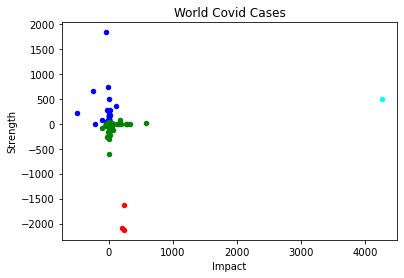

In [45]:
%run -i "scripts/knn.py"

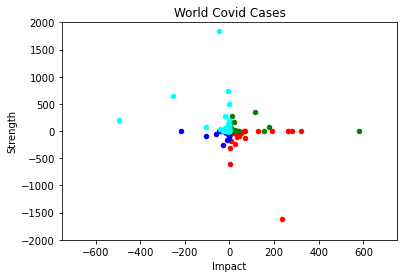

In [46]:
%run -i "scripts/algo.py"

In [129]:
%run -i "scripts/geo_visualization.py"

In [117]:
import geopandas as gpd
import pandas as pd

Geo_results = pd.read_csv('C://Users/usama/OneDrive/Desktop/github/covid-19-global-status/output/status_algo.csv')
Geo_results = Geo_results.sort_values(by=['Prediction'])
Geo_data=pd.concat([Geo_results['Countries'], Geo_results['Status'], Geo_results['Prediction']], axis=1)
Geo_data.columns = ['Country', 'Status', 'Prediction']

In [124]:
Geo_data.loc[Geo_data['Country'] == 'US', 'Country'] = 'United States of America'
#Geo_data[Geo_data['Country'] == 'United States of America']
Geo_results.loc[Geo_results['Countries'] == 'US', 'Countries'] = 'United States of America'
#Geo_results[Geo_results['Countries'] == 'United States of America']

In [125]:
gdf = gpd.read_file('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json')
gdf1 = gdf.merge(Geo_results, left_on='name', right_on='Countries', how='left')

In [126]:
import folium

centroid=gdf1.geometry.centroid
m = folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=1.5, tiles='OpenStreetMap')

folium.GeoJson(gdf1[['geometry', 'name', 'Prediction','Status']], 
               name = "World Status of Covid - 2020",
               style_function = lambda x: {"weight":1, 'color':'grey','fillColor':'#FF5A5F' if x['properties']['Prediction'] == 0 else ( '#C81D25' if x['properties']['Prediction'] == 1 else ('#0B3954' if x['properties']['Prediction'] == 2 else '#087E8B')) ,
                                           'fillOpacity':0.8, 'colorOpacity': 0.1},
               highlight_function=lambda x: {'weight':3, 'color':'grey', 'fillOpacity':1},
               smooth_factor=2.0,
               tooltip=folium.features.GeoJsonTooltip(fields=['name','Status',],
                                              aliases=['Country:','Status:'], 
                                              labels=True, 
                                              sticky=True,
                                             )
).add_to(m)

#folium.LayerControl(autoZIndex=False, collapsed=False).add_to(m)

m

In [127]:
m.save('output/covid19.html')